Proposal


The Assassin (2015) is a wuxia film (a sub-genre of the martial arts film based on mythology and often associates with political conflicts) directed by Hou Hsiao-hsien. Once the film was released, there were polarised discussions about the story and mise-en-scene  (such as colour, lighting, composition and so on) in China due to difficulty of interpretating and understanding. The same discussions happened on Rotten Tomatoes as the tomatometers (critics) give the film 80% of freshness, while there is 47% of audience has rated 3.5 stars or higher. My project aims to investigate what do western audience think of the story and mise-en-scene of this film, and how much do they understand and like the film. The project tries to state that western audience are able to interpret the film’s story and mise-en-scene very simply, as the generated WordCloud shows words like ‘beautiful’, ‘martial’, ‘Chinese’. The polarised discussions exist due to both positive and negative adjectives in 50 highest-frequency words chart. The average sentiment tends to be neutral, which means they do not show obvious preferences of this film. In conclusion, mise-en-scene is able to work effectively on a very basic level of interpretation for the western audience, but probably fails to evoke more responses on cultural dimension. 

The project will mine the data which contains a total of 284 reviews on Rotten Tomatoes from both critics and audience to produce average analysis. The implementation will be divided into four steps. Firstly, I will use BeautifulSoup to create two loops to iteratively scrape all the content includes names, dates, reviews and scores from both audience and critics. Secondly, I will import Pandas and use DataFrame to visualise the scraped data in a chart. Thirdly, I will use WorldCloud to visualise some most frequency words. The aim is to offer a simple overview of the words that being mentioned the most in all the reviews. Fourthly, in order to process more accurate analysis of word frequency of reviews, the NLP will be applied to process by following a process order of segmentation, cleaning, normalisation and tokenisation. By using matplotlib, the 50 highest-frenquency words will be visualised to form a line chart in order to see counts of each word and the variation between all these words. Finally, the sentiment analysis will be applied to get polarity and subjectivity of each piece of review and the mean scores of all the reviews. 

Scholars could be able to compare the analysis with others across different platforms, discovering and annotating implications of the data, digital platforms. On the other hand, research questions such as ‘in what ways mise-en-scene can help people from different culture backgrounds understand certain culture elements effectively’ could be formed. For the public, reviews could be used to decide whether they should watch the film or not. Economically, the data can be referenced by film production companies for marketing analysis and the data is able to applied on producing other films.

In [1]:
# Import all the libraries that we need
import requests as re
from bs4 import BeautifulSoup as bs
import csv
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Download all the packages
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
### Scarpe all NAMES, REVIEWS and DATES from both CRITICS and AUDIENCE.

# Let's first do scarping for critics.
# Import BeautifulSoup in order to scrape the html elements that i need (see in the first cell).
# create a list of 6 urls and scarpe content i need across 6 pages.
batchURL=['https://www.rottentomatoes.com/m/the_assassin_2015/reviews/',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=2&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=3&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=4&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=5&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=6&sort=']


# Write the loop to iterate through each url in the batchURL list to take all steps needed to fetch url, 
# store and parse html and scrape off the chosen content.
# Append iteratively scarped to empty lists of criticReviews, criticNames and criticDates in the end and print them.
criticReviews=[]        
criticNames=[]   
criticDates=[]

for page in batchURL:
    url=re.get(page)
    print(url)
    content=url.content
    print(content)
    reviews=bs(content,'html.parser')
    print(reviews.title)
    for i in reviews.find_all('div', class_='the_review'):
        text=i.text
        print(text)
        criticReviews.append(text)
   
    names=bs(content,'html.parser')
    print(names.title)
    for i in names.find_all('a', class_='unstyled bold articleLink'):
        text=i.text
        print(text)
        criticNames.append(text)  
        
    dates=bs(content, 'html.parser')
    print(dates.title)
    for i in dates.find_all('div',class_='review_date subtle small'):
        text=i.text
        print(text)
        criticDates.append(text)  
        
criticReviews      
criticNames   
criticDates

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt_redesign.less" type="text/css" rel="stylesheet"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="google-site-verification" content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc"/> <meta name="msvalidate.01" content="034F16304017CA7DCF45D43850915323"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="//d2a5cgar23scu2.cloudfron

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 The Assassin is undeniably one of the most beautiful-looking films to come out all year - however fans of interesting characters, cinematic thrills and coherent narratives should look elsewhere.
 The Assassin packs nearly every kind of arty, intersectional-feminist fan's fantasy into one movie.
 Sweeping, gorgeous, and head-scratchingly inaccessible, The Assassin is a challenging watch that asks much of its audience.
 The Assassin" is a gorgeous film, artfully structured, that bares however, little semblance to the wuxia genre, apart from the era it takes place.
 Much like Wong with The Grandmaster, Hou has made a martial arts film that is more of a personal statement than a genre piece, but his style suits the genre surprisingly well and certainly makes its mark in martial arts cinema.
 You're not likely to see a better film this year.
 The pictorial beauty of this scene is self-evident; it's in Hou's painstaking orchestra

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 A completely essential new entry in the great career of Hou Hsiao-Hsien.
 One feels instantaneously cracked across the head, as if by dojo stick-warning from all this cinematic artistry, the degree of which is rarely seen in film these days.
 The Assassin is a complete reinvention of the "wuxia" genre in its visual and narrative treatment. [Full review in Spanish]
 The Assassin, which pushes the boundaries and stereotypes of martial arts film, is a striking work whose arrival at our multiplexes should be saluted, or at the very least welcome.
 The most beautiful and transcendent film of the year.
 The Assassin summons a strangely rapturous experience from its ostensibly bewildering narrative, which only adds to the air of mystique. An instant classic.
 A beautiful and contained film by Hou... it boasts sensational sequences. [Full review in Spanish]
 Intriguing at times because of a maliciously dosed ambiguity, The Assassin

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 The director pays exhaustive attention to sound editing and mise-en-scène. 
 A film of surpassingly exquisite visual beauty.
 It's a wonderful thing to behold. It's also a frustrating beast to absorb.
 Episodic scenes of violence ensue but fans of martial arts should bed in for something more slow, spare and mysterious than the likes of Crouching Tiger, Hidden Dragon.
 It's cinematic night nurse.
 A breathtaking work of art which revolves around a haunting female lead.
 It's steadily paced, with more long-held contemplative shots of natural beauty than bursts of impressive action, and an elastic, dream-like sense of passing time.
 "The Assassin" is gorgeous to look at, but not all that compelling to watch.
 All of the ingredients of a Shakespeare play
 Every frame of Hou's gorgeously crafted film is a masterclass in composition, colour, movement and sound.
 A painterly historical drama that is emotionally sterile. Grab it i

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 It's glorious to look at and impossible to stop pondering.
 The visuals relegate the acting to secondary importance. They overwhelm the story. And they make "The Assassin" unforgettable.
 What it lacks in simplicity of narrative, The Assassin expertly makes up for in its presentation.
 One hallmark of a good action director is the ability to make stillness and silence as dramatic as movement and noise. The Assassin, directed by Taiwan's Hou Hsiao-hsien, carries this principle as far as it can go.
 Hou should be congratulated for making the most boring martial arts movie ever.
 The film's cinematography, costumes and set design are breathtaking, an elegant façade heavily cloaking the story's core emotions.
 A Hou film and, therefore an aesthete's delight...The Assassin breathes more than it talks, patiently taking in its landscapes and its silk-curtained interiors.
 Hou Hsiao-hsien wields cinematic tools with such delicate p

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt_redesign.less" type="text/css" rel="stylesheet"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="google-site-verification" content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc"/> <meta name="msvalidate.01" content="034F16304017CA7DCF45D43850915323"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="//d2a5cgar23scu2.cloudfron

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 October 15, 2015
 October 15, 2015
 October 12, 2015
 October 9, 2015
 September 25, 2015
 September 20, 2015
 September 18, 2015
 September 11, 2015
 September 11, 2015
 September 10, 2015
 August 12, 2015
 May 28, 2015
 May 28, 2015
 May 28, 2015
 May 28, 2015
 May 28, 2015
 May 28, 2015
 May 28, 2015
 May 28, 2015
 May 28, 2015


[' April 9, 2019',
 ' March 7, 2019',
 ' February 2, 2019',
 ' November 3, 2018',
 ' October 29, 2018',
 ' February 12, 2018',
 ' November 10, 2017',
 ' September 1, 2017',
 ' August 16, 2017',
 ' August 14, 2017',
 ' February 24, 2017',
 ' January 2, 2017',
 ' October 18, 2016',
 ' October 13, 2016',
 ' October 6, 2016',
 ' October 5, 2016',
 ' October 3, 2016',
 ' October 3, 2016',
 ' October 3, 2016',
 ' July 19, 2016',
 ' July 10, 2016',
 ' June 6, 2016',
 ' June 2, 2016',
 ' May 10, 2016',
 ' April 19, 2016',
 ' April 2, 2016',
 ' April 1, 2016',
 ' March 31, 2016',
 ' March 24, 2016',
 ' February 22, 2016',
 ' February 13, 2016',
 ' January 25, 2016',
 ' January 25, 2016',
 ' January 25, 2016',
 ' January 25, 2016',
 ' January 25, 2016',
 ' January 24, 2016',
 ' January 23, 2016',
 ' January 22, 2016',
 ' January 22, 2016',
 ' January 22, 2016',
 ' January 22, 2016',
 ' January 22, 2016',
 ' January 22, 2016',
 ' January 21, 2016',
 ' January 21, 2016',
 ' January 18, 2016',
 ' J

In [3]:
# Then scarpe for critics. Using the same process and method above. 
# Import BeautifulSoup in order to scrape the html elements that i need (see in the first cell).
# create a list of 6 urls and scarpe content i need across 9 pages.
batchURL2=['https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?type=user',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=2&type=user&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=3&type=user&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=4&type=user&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=5&type=user&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=6&type=user&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=7&type=user&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=8&type=user&sort=',
         'https://www.rottentomatoes.com/m/the_assassin_2015/reviews/?page=9&type=user&sort=']


# Write the loop to iterate through each url in the batchURL list to take all steps needed to fetch url, 
# store and parse html and scrape off the chosen content.
# Append iteratively scarped to empty lists of audienceReviews, audienceNames and audienceDates in the end and print them.
audienceReviews=[]        
audienceNames=[]   
audienceDates=[]

for page in batchURL2:
    url=re.get(page)
    print(url)
    content=url.content
    print(content)
    a_reviews=bs(content,'html.parser')
    print(a_reviews.title)
    for i in a_reviews.find_all('div', class_='user_review'):
        text=i.text
        print(text)
        audienceReviews.append(text)
        
    a_names=bs(content,'html.parser')
    print(a_names.title)
    for i in a_names.find_all('a', class_='bold unstyled articleLink'):
        text=i.text
        print(text)
        audienceNames.append(text)  
        
    a_dates=bs(content, 'html.parser')
    print(a_dates.title)
    for i in a_dates.find_all('span',class_='fr small subtle'):
        text=i.text
        print(text)
        audienceDates.append(text)
        
audienceReviews      
audienceNames   
audienceDates

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt_redesign.less" type="text/css" rel="stylesheet"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="google-site-verification" content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc"/> <meta name="msvalidate.01" content="034F16304017CA7DCF45D43850915323"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="//d2a5cgar23scu2.cloudfron

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
  Full disclosure: It's been a while since I couldn't finish a film, but spending 2 hours of my life on this just wasn't in me. I gave up about half way through, so this review is based on what I saw during that time, for what it's worth.If someone had told me that this was made by someone still learning their craft or that I was watching an unedited version, I'd be inclined to believe them. The story seems pointless with incredibly uninteresting characters that have no charisma whatsoever and equally boring dialogue. The editing, as alluded to before, is also quite bizarre. What really makes this impossible viewing, though, is just how painfully slow it is. I mean, there's slow and then there's this, where every movement of the camera, every action of a character - every look, every step, every moment between them - and every line of dialogue seems to have been purposefully executed in the slowest manner possible, lingering

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 Late R 
 Serge L 
 Eleni C 
 Thiam P 
 Carlos M 
  
 Art S 
 Suvo P 
 Alonso A 
 Conrad T 
 Endymion R 
 Deepak M 
 Terry D 
 ?? ? 
 Philip H 
 Waleed A 
 Andy D 
 Guilherme N 
 Nick K 
 Inna H 
<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
October 21, 2018
October 12, 2018
September 30, 2018
September 26, 2018
September 24, 2018
August 12, 2018
April 29, 2018
April 2, 2018
December 28, 2017
October 27, 2017
October 19, 2017
July 22, 2017
July 9, 2017
June 8, 2017
February 18, 2017
February 16, 2017
February 15, 2017
February 8, 2017
December 27, 2016
September 25, 2016
<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
  I was sure I'd love this film, but I was wrong. It's a Martial Arts film from a master director, but I just didn't connect with it. The visuals are absolutely gorgeous, but I couldn't follow the story, and after a while I just didn't care, at which point the film became tedious to complete. A lot of critics seemed to have loved it, but it just didn't work for me. Decide for yourself.
  An absolutely beautiful, well-paced film that shares a compelling story and exhibits reverence for the majesty of the nature world.
  One needs to embrace the silence to enjoy this slow underrated art film. This film looks like you're just watching the nature screensaver of your computer.
  A visually crafted splendor!!! An amazing film!!
  It's hard to imagine what critics saw in Hou's Assassin. Its action, what little there is, looks terrible and lacks impact and the rest of the film, of which there is a lot, is mostly abstract conversatio

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 Brad S 
 Caroline S 
 Jerico T 
 Sean C 
 Phillip D 
 House M 
 Archie G 
 Todd G 
 David J 
 Luigi K 
 Walter P 
 Carlos Z 
 Lazhward K 
 Rangan R 
 Greg H 
 Jamie T 
 Stephen S 
 Sandra A 
 Jessica T 
<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
September 24, 2016
September 22, 2016
September 19, 2016
September 15, 2016
September 11, 2016
September 8, 2016
August 24, 2016
August 24, 2016
August 1, 2016
July 17, 2016
July 8, 2016
June 24, 2016
June 19, 2016
June 14, 2016
June 8, 2016
May 30, 2016
May 23, 2016
May 16, 2016
May 6, 2016
<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt_redesign.less" type="text/css" rel="stylesheet"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="google-site-verification" content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc"/> <meta name="msvalidate.01" content="034F16304017CA7DCF45D43850915323"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="//d2a5cgar23scu2.cloudfron

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
  Pacing is pretty glacial, but I liked the way the film played with aspect ratio. Great visuals, not as good of a story as I was hoping for.
  This film restored my faith in Asian cinema. Beautiful in every aspect.
  -The Assassin (Chinees: ?????) is een 2015 martial arts film geregisseerd door de Taiwanese regisseur Hou Hsiao-Hsien. Een Taiwan-China-Hongkong coproductie,het was een officiële selectie in de belangrijkste wedstrijd van het 2015 Cannes Film Festival. In Cannes, Hou won de award voor beste regisseur. Deze werd vrijgegeven in Taiwan op 28 augustus 2015 en een dag eerder, op 27 augustus in China en Hongkong. Het was geselecteerd als de Taiwanese invoer voor de Beste Buitenlandse Taal Film op de 88ste Academy Awards, maar het was niet genomineerd.--Kritische reactie:-The Assassin opengesteld voor critici. Recensie aggregator website Rotten Tomatoes, heeft de film een 77% "Gecertificeerd vers" waardering, gebaseer

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
  Its very pretty to look at, but I found it basically entirely incomprehensible. Perhaps the failing is my own, but I thought there was not nearly enough 'sign-posting' of who was who to enable to have faintest clue what was going on.
  So so so gorgeous and the action scenes (which are very few and very far between) can be awe inspiring. Honestly "The Assassin" is reminiscent of a Refn film in many ways. Too bad the story is just so bland and the entire thing moves at such a slow pace that at first is mesmerizing but by the end it's almost impossible to stay motivated.
  The Director has created a truly random film where you can take every scene and reassemble them in any order and the result would make as much sense as any other. Endless scenes of unexplained wandering characters
  Breathtaking 1.5 hours of sublimity and monotonousness.
  A Political thinking about a lonely man/woman in a big time. Like China/Taiwan today

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
 Patrick D 
 Jake R 
 Colin P 
 ?? ? 
 Huang T 
 August M 
 Irene M 
 Mont 3 
 David L 
 Jason M 
 Loretta D 
 David H 
 Christopher H 
 Heather P 
 Kyle B 
 Max M 
 Nora B 
 Lawrence L 
 Max N 
 Timothy A 
<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
January 27, 2016
January 26, 2016
January 21, 2016
January 19, 2016
January 19, 2016
January 19, 2016
January 17, 2016
January 15, 2016
January 10, 2016
January 8, 2016
January 6, 2016
January 1, 2016
December 27, 2015
December 27, 2015
December 21, 2015
December 20, 2015
December 20, 2015
December 20, 2015
December 19, 2015
December 18, 2015
<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="htt

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt_redesign.less" type="text/css" rel="stylesheet"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="google-site-verification" content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc"/> <meta name="msvalidate.01" content="034F16304017CA7DCF45D43850915323"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="//d2a5cgar23scu2.cloudfron

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt_redesign.less" type="text/css" rel="stylesheet"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="google-site-verification" content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc"/> <meta name="msvalidate.01" content="034F16304017CA7DCF45D43850915323"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="//d2a5cgar23scu2.cloudfron

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
  I wanted to see this movie since it premiered at Cannes and received great reviews, and even won the best director award. And so, although I have to admit that I was a little bored during movie, it did look beautiful and every shot looked like a perfect composition and like it could be a photograph. However, like I said before, the story was very confusing to follow who was who and what was happening, that I became bored but still it was a very different movie from what I usually watch. ~October 24, 2015~
  I feel the need to offer a review in contrast to the others, in hopes of saving you some time and money. This is almost purely an exercise in meditative stillness and patience, filled with achingly slow scenes where hardly a word is uttered. I can't imagine most modern movie goers would be inclined to stick around for any of it. The trailer might lead you astray, revealing almost all of the surprisingly brief action sce

<Response [200]>
b'<!DOCTYPE html>\n<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" >\n    <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#"> <script src="//cdn.optimizely.com/js/594670329.js"></script> <link href="https://d2a5cgar23scu2.cloudfront.net/v/less/?f=/styles/rt_redesign.less" type="text/css" rel="stylesheet"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/> <meta name="viewport" content="width=device-width,initial-scale=1"> <meta name="google-site-verification" content="VPPXtECgUUeuATBacnqnCm4ydGO99reF-xgNklSbNbc"/> <meta name="msvalidate.01" content="034F16304017CA7DCF45D43850915323"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/> <link href="//d2a5cgar23scu2.cloudfront.net/static/images/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="//d2a5cgar23scu2.cloudfron

<title>The Assassin - Movie Reviews - Rotten Tomatoes</title>
  What the hell are you people taljing about? Vthis movie is a total piece of crap!I just got out of a viewing at the Toronto Film Festival and when the film FINALLY ended, the was what might be pilitely referred to as a "smattering" of applause where more films would get plenty.I didn't count but there didn't seem to be nore than a hundred words used in the entire film,lgranted, there were some very beautiful shots peppered throughout the film but watching scenes of grass growing is simply a waste of my viewing time!This flick looks like somebody started out makng a kung-foo movie but ran out of money. Then they chipped up the big fight scene. Spread it throughtout the movie and filled the rest of the two hours with shots of grass, water and goats chewing.Avoid this picture at all costs.It cots me $40 to learn that lesson.I feel visually and mentally raped.Somebody owes me an apilogy, with or withour sub-titles.
  A beautif

['October 21, 2018',
 'October 12, 2018',
 'September 30, 2018',
 'September 26, 2018',
 'September 24, 2018',
 'August 12, 2018',
 'April 29, 2018',
 'April 2, 2018',
 'December 28, 2017',
 'October 27, 2017',
 'October 19, 2017',
 'July 22, 2017',
 'July 9, 2017',
 'June 8, 2017',
 'February 18, 2017',
 'February 16, 2017',
 'February 15, 2017',
 'February 8, 2017',
 'December 27, 2016',
 'September 25, 2016',
 'September 24, 2016',
 'September 22, 2016',
 'September 19, 2016',
 'September 15, 2016',
 'September 11, 2016',
 'September 8, 2016',
 'August 24, 2016',
 'August 24, 2016',
 'August 1, 2016',
 'July 17, 2016',
 'July 8, 2016',
 'June 24, 2016',
 'June 19, 2016',
 'June 14, 2016',
 'June 8, 2016',
 'May 30, 2016',
 'May 23, 2016',
 'May 16, 2016',
 'May 6, 2016',
 'May 4, 2016',
 'April 27, 2016',
 'April 19, 2016',
 'April 19, 2016',
 'April 16, 2016',
 'April 16, 2016',
 'April 12, 2016',
 'April 12, 2016',
 'April 8, 2016',
 'April 4, 2016',
 'April 3, 2016',
 'April 1, 2

In [4]:
# Combine the same categories together to create 3 final lists of NAMES, DATES and REVIEWS. 
# This step aims to prepare for forming DataFrame. 
finalnames=criticNames+audienceNames
finaldates=criticDates+audienceDates
finalreviews=criticReviews+audienceReviews

In [5]:
## Create DataFrame which contains three columns by using the 3 lists above.

# Load pandas to put up 3 lists as columns in pandas' DataFrame.
import pandas as pd
myList = [finalnames,finalreviews, finaldates]


# To do a concatenation of Series and DataFrame with the pd.concat function
# The index should start with 1 instead of 0.
# With the pandas method columns(), rename the columns with 'Name', 'Review' and 'date'.
filmDF = pd.concat([pd.Series(x) for x in myList], axis=1)
filmDF.index = range(1,len(filmDF) + 1)
filmDF.columns=['Name','Review','Date']
filmDF

# Clean the DataFrame by dropping two rows of 134 and 287 which contain wrong datasets.
filmDF.drop(index=281,axis=0)
filmDF.drop(index=134,axis=0)

,Name,Review,Date
1,Nick Evan-Cook,The Assassin is undeniably one of the most be...,"April 9, 2019"
2,Ren Jender,"The Assassin packs nearly every kind of arty,...","March 7, 2019"
3,Ed Travis,"Sweeping, gorgeous, and head-scratchingly ina...","February 2, 2019"
4,Panos Kotzathanasis,"The Assassin"" is a gorgeous film, artfully st...","November 3, 2018"
5,Harris Dang,"Much like Wong with The Grandmaster, Hou has ...","October 29, 2018"
6,Steve Erickson,You're not likely to see a better film this y...,"February 12, 2018"
7,Jordan Cronk,The pictorial beauty of this scene is self-ev...,"November 10, 2017"
8,Candice Frederick,I say this all to say that folks have been fa...,"September 1, 2017"
9,Dan Webster,I was NOT prepared for was just how beautiful...,"August 16, 2017"
10,Alex Heeney,The film tried my patience even as I marveled...,"August 14, 2017"


In [6]:
# Get the summary of the DataFrame you created with info() method.
filmDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 1 to 284
Data columns (total 3 columns):
Name      284 non-null object
Review    284 non-null object
Date      284 non-null object
dtypes: object(3)
memory usage: 6.7+ KB


In [7]:
# Write out the data to a CSV file named 'TheAssassin.csv'.
filmDF.to_csv('TheAssassin.csv', encoding='utf-8')

# Read in the csv file and clean it
# Specify column names with names= when loading the file.
# skiprows= removes specified rows when loading.
# Set skiprows to 1 to get rid of the index rows per each column which are in index position 1.
# The column names you are passing as an argumen are in index position 0.
TheAssassin = pd.read_csv('TheAssassin.csv', sep=',', names=['Name', 'Review', 'Date'],skiprows=1)
TheAssassin

,Name,Review,Date
1,Nick Evan-Cook,The Assassin is undeniably one of the most be...,"April 9, 2019"
2,Ren Jender,"The Assassin packs nearly every kind of arty,...","March 7, 2019"
3,Ed Travis,"Sweeping, gorgeous, and head-scratchingly ina...","February 2, 2019"
4,Panos Kotzathanasis,"The Assassin"" is a gorgeous film, artfully st...","November 3, 2018"
5,Harris Dang,"Much like Wong with The Grandmaster, Hou has ...","October 29, 2018"
6,Steve Erickson,You're not likely to see a better film this y...,"February 12, 2018"
7,Jordan Cronk,The pictorial beauty of this scene is self-ev...,"November 10, 2017"
8,Candice Frederick,I say this all to say that folks have been fa...,"September 1, 2017"
9,Dan Webster,I was NOT prepared for was just how beautiful...,"August 16, 2017"
10,Alex Heeney,The film tried my patience even as I marveled...,"August 14, 2017"


['Review'].str.lower()
data = pd.read_csv('./data/moive_metadata.csv', dtype={'title_year':str})

In [8]:
# Get the summary of the data with describe().
TheAssassin.describe()

,Name,Review,Date
count,284,284,284
unique,280,284,199
top,?? ?,"worst movie..about....surprise? an assassin,...","October 15, 2015"
freq,2,1,10


There are 95343 words in the combination of all reviews.


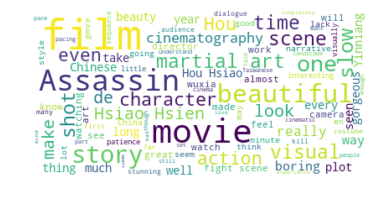

In [9]:
### Let's produce a wordcloud by using WordCloud, STOPWORDS libraries
# This whole part of making wordcloud is referenced from blow:
# Datacamp (2018). Generating WordClouds in Python[Online]. Available: https://www.datacamp.com/community/tutorials/wordcloud-python [Accessed 25th April 2019].


# join all items in a tuple into a string to count how many words in the combination of all reviews within a sentence.
text = " ".join(review for review in TheAssassin.Review)
print ("There are {} words in the combination of all reviews.".format(len(text)))


# Generate a wordcloud image.
# Customise max_font_size, the maximum number of word and lighten the background instead of a black one for clearer vision. 
wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=100).generate(text)

# Display the generated wordcloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [10]:
### Let's make the word frequency by using the nltk 

# By following NLP, let's first clean the reviews.
# 'The strip() method returns a copy of the string with both leading and trailing characters removed'(Programiz.com, 2019).
# Programiz.com. (2019) Python String strip() - Python Standard Library. [online] Available at: https://www.programiz.com/python-programming/methods/string/strip [Accessed 26 Apr.2019].
finalreviews_new = text.strip()
finalreviews_new


# Use regular expression to match or find strings.
# Clean the text and remove all the meaningless words and symbols. 
import re
finalreviews_new1 = re.sub(r'\d+\.','',text)
finalreviews_new1

finalreviews_clear = finalreviews_new1.replace(' [Full review in Spanish] ','').replace(' [Cannes 2015]','').replace('[','').replace(']','').replace('-','').replace('\'','').replace('/','').replace('\\','').replace('"','').replace('.','').replace(',','').replace(':','').replace('(','').replace(')','').replace('?','').replace('&','')      
finalreviews_clear

# Turn all the text to lower cases for the aim of normalisation.
finalreviews_lower = finalreviews_clear.lower()
finalreviews_lower


# Tokenise the text and split the text into individual word
wordlist=finalreviews_lower.split()
wordlist


# From this part below, I used this reference to write codes:
# Tencent Cloud (2018) Python NLTK 自然语言处理入门与例程[Online]. Available: https://cloud.tencent.com/developer/article/1043114 [Accessed 26 April.2019].
# Import stopwords from nltk.
from nltk.corpus import stopwords
stopwords.words('english')
nltk.probability.FreqDist

# In order to clean the text, i duplicate the list to form a new one and remove stopwords in this new list.
clean_wordlist = wordlist[:] 
sr = stopwords.words('english')
for token in wordlist:
    if token in stopwords.words('english'):
        clean_wordlist.remove(token)
        
# Use FreqDist() to count word frequency        
freq = nltk.FreqDist(clean_wordlist) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

assassin:105
undeniably:2
one:56
beautifullooking:1
films:35
come:8
year:17
however:15
fans:5
interesting:14
characters:24
cinematic:12
thrills:2
coherent:3
narratives:1
look:22
elsewhere:1
packs:1
nearly:5
every:21
kind:6
arty:2
intersectionalfeminist:1
fantasy:2
movie:118
sweeping:1
gorgeous:20
headscratchingly:1
inaccessible:1
challenging:1
watch:20
asks:1
much:26
audience:9
film:191
artfully:1
structured:1
bares:1
little:17
semblance:1
wuxia:26
genre:20
apart:3
era:2
takes:14
place:5
like:66
wong:3
grandmaster:5
hou:45
made:16
martial:39
arts:38
personal:4
statement:1
piece:11
style:14
suits:2
surprisingly:4
well:24
certainly:9
makes:15
mark:5
cinema:12
youre:5
likely:2
see:17
better:7
pictorial:2
beauty:25
scene:16
selfevident;:1
hous:16
painstaking:1
orchestration:1
component:1
part:10
thematic:1
weight:2
imparted:1
careful:1
configuration:1
lends:1
steadily:2
increasing:1
romantic:1
gravitas:1
say:9
folks:1
fallen:2
chinese:20
drama:10
indeed:3
solid:2
nothing:9
havent:3
prepare

apparently:1
designates:1
winner:1
gold:2
ground:3
return:2
ores:1
soil:1
whence:1
formerly:1
area:1
safe:1
elaborate:1
witchcraft:1
fairy:1
following:1
snore:1
thrilling:3
toe:1
water:2
mid:1
designart:1
recommend:5
selections:1
deserved:1
win:2
hints:1
behind:3
curtain:1
spying:1
foremost:1
wildly:1
entertaining:3
performance!!!:1
special:2
effects!!!:1
expected:1
reviews:3
unnecessary:3
went:1
averse:1
digressions:1
fundamental:1
emptiness:1
shallowness:1
historicity:1
agonizing:1
stillnessthe:1
post2000s:1
tradition:1
artification:1
process:2
generic:2
elevation:1
spearheaded:1
mainland:2
5th:1
generation:1
zhang:2
yimous:2
efforts:1
recently:1
tackled:2
kar:1
wais:1
baby:1
project:1
aspires:1
film;:2
falls:2
bothas:1
flaccid:1
refuses:1
engage:1
keeping:1
arms:1
smug:1
pretension:2
unyieldy:1
it;:1
theyre:2
clumsy:2
fumbling:1
devoid:2
longest:1
unnamed:2
running:1
trees:1
pursuers:1
him;:1
caught:2
vines:1
seemingly:2
untangling:1
fair:1
favourite:1
partly:2
unintentional:1
comed

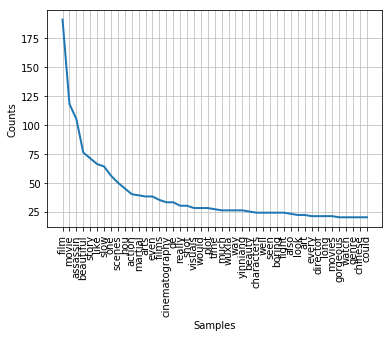

In [11]:
# Visulise the 50 highest-frequency words by using Matplotlib in a line chart.
freq.plot(45,cumulative=False)

In [12]:
### Finally, let's do sentiment analysis based on the reviews
# Bookdown.org. (2019). 文科生数据科学上手指南. [online] Available at: https://bookdown.org/wshuyi/dive-into-data-science-practically/nlp-in-python.html#sentiment-analysis-with-python [Accessed 27 Apr. 2019].


## Run the following commands to install packages:
# pip install -U textblob
# python -m textblob.down_corpora


# Import following libraries for sentiment analysis and parser functions
from dateutil import parser
from textblob import TextBlob

# In the DataFrame, the date columns has no specifc time which means the pandas is not able to read them as forms of date.
# So I write these two lines of code to gain the right form of date data.
TheAssassin["Date"]=TheAssassin.Date.apply(parser.parse)

In [13]:
# Define function in order to process all the Review text
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment.polarity

# Use DataFrame's apply method to apply functions to a new column named 'Sentiment'.
TheAssassin["Sentiment"]=TheAssassin.Review.apply(get_sentiment)
# Check all 284 rows of data
TheAssassin.head(284)

,Name,Review,Date,Sentiment
1,Nick Evan-Cook,The Assassin is undeniably one of the most be...,2019-04-09,0.375000
2,Ren Jender,"The Assassin packs nearly every kind of arty,...",2019-03-07,0.350000
3,Ed Travis,"Sweeping, gorgeous, and head-scratchingly ina...",2019-02-02,0.466667
4,Panos Kotzathanasis,"The Assassin"" is a gorgeous film, artfully st...",2018-11-03,0.256250
5,Harris Dang,"Much like Wong with The Grandmaster, Hou has ...",2018-10-29,0.230612
6,Steve Erickson,You're not likely to see a better film this y...,2018-02-12,0.250000
7,Jordan Cronk,The pictorial beauty of this scene is self-ev...,2017-11-10,0.016667
8,Candice Frederick,I say this all to say that folks have been fa...,2017-09-01,0.000000
9,Dan Webster,I was NOT prepared for was just how beautiful...,2017-08-16,0.566667
10,Alex Heeney,The film tried my patience even as I marveled...,2017-08-14,0.125000


In [14]:
# Do sentiment analysis for the whole text, ploarity varies between [-1,1] and the result tend to be neutral.
# Can compare sentiment analysis of each review to the mean.
blob = TextBlob(text)
blob
blob.sentiment

Sentiment(polarity=0.13011504300050222, subjectivity=0.5264072404581177)